---


**Name:** Jann Moises Nyll B. De los Reyes

**Section:** CPE22S3

**Date:** March 24, 2024

**Submitted to:** Engr. Roman M. Richard

---

# **Seatwork 11.1 Exploratory Data Analysis for Machine Learning**

Instructions:

* Download the datasets here:

  * For Linear Regression Analysis: https://archive-beta.ics.uci.edu/dataset/10/automobileLinks to an external site.
  * For Logistic Regression Analysis: https://archive-beta.ics.uci.edu/dataset/109/wineLinks to an external site.

* Perform exploratory data analysis (which must include data pre-processing/wrangling).

* Submit the notebook with the cleaned data and the EDA.


Note:

* Your submission must be PDF file.
* However, submit the link of your python notebook and submit the link in the comments.

## **Linear Regression Analysis**
https://archive.ics.uci.edu/dataset/10/automobile

###**Import and Install Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline

###**Check the data**

In [3]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)


{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

###**Access each dataframe**

In [6]:
X.columns

Index(['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
       'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size',
       'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width',
       'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style',
       'num-of-doors', 'aspiration', 'fuel-type', 'make', 'normalized-losses'],
      dtype='object')

In [7]:
y.columns

Index(['symboling'], dtype='object')

###**Merge Dataframe**

In [9]:
df = pd.concat([X,y], axis = 1)
df.head()

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  wheel-base engine-location  \
0    2.68  3.47        mpfi          130  ...        88.6           front   
1    2.68  3.47        mpfi          130  ...        88.6           front   
2    3.47  2.68        mpfi          152  ...        94.5           front   
3    3.40  3.19        mpfi          109  ...        99.8           front   
4    3.40  3.19        mpfi          136  ...        99.4           front   

   drive-wheels   body-style  num-of-doors  aspiration  fuel-type  \
0           rwd  convertible           2.0         std        gas   
1           rwd  convertible           2.0         std        gas   
2           rwd    hatchback           2.0         std        gas   
3           fwd        sedan           4.0         std        gas   
4           4wd        sedan           4.0         std        gas   

          make normalized-losses symboling  
0  alfa-romero               NaN         3  
1  alfa-romero               NaN         3  
2  alfa-romero               NaN         1  
3         audi             164.0         2  
4         audi             164.0         2  

[5 rows x 26 columns]

###**Data Wrangling and Explanatory Data Analysis**


Now, we will explore the data to gain insights about the data

In [10]:
df.shape

(205, 26)

We can see that there are  205 instances and  26 variables in the dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [13]:
col_names = df.columns

col_names

Index(['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
       'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size',
       'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width',
       'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style',
       'num-of-doors', 'aspiration', 'fuel-type', 'make', 'normalized-losses',
       'symboling'],
      dtype='object')

###**Rename columns**





In [43]:
df.rename(columns = {'highway-mpg':'highway_mpg','compression-ratio':'compression_ratio',
                     'fuel-system':'fuel_system','engine-size':'engine_size',
                     'num-of-cylinders':'num_of_cylinders','engine-type':'engine_type',
                     'curb-weight':'curb_weight','wheel-base':'wheel_base','engine-location':'engine_location',
                     'drive-wheels':'drive_wheels','body-style':'body_style','num-of-doors':'num_of_doors',
                     'fuel-type':'fuel_type','city-mpg':'city_mpg','peak-rpm':'peak_rpm',
                     'normalized-losses':'normalized_losses'}, inplace = True)

df

price  highway_mpg  city_mpg  peak_rpm  horsepower  compression_ratio  \
0    13495.0           27        21    5000.0       111.0                9.0   
1    16500.0           27        21    5000.0       111.0                9.0   
2    16500.0           26        19    5000.0       154.0                9.0   
3    13950.0           30        24    5500.0       102.0               10.0   
4    17450.0           22        18    5500.0       115.0                8.0   
..       ...          ...       ...       ...         ...                ...   
200  16845.0           28        23    5400.0       114.0                9.5   
201  19045.0           25        19    5300.0       160.0                8.7   
202  21485.0           23        18    5500.0       134.0                8.8   
203  22470.0           27        26    4800.0       106.0               23.0   
204  22625.0           25        19    5400.0       114.0                9.5   

     stroke  bore fuel_system  engine_size  ...  wheel_base engine_location  \
0      2.68  3.47        mpfi          130  ...        88.6           front   
1      2.68  3.47        mpfi          130  ...        88.6           front   
2      3.47  2.68        mpfi          152  ...        94.5           front   
3      3.40  3.19        mpfi          109  ...        99.8           front   
4      3.40  3.19        mpfi          136  ...        99.4           front   
..      ...   ...         ...          ...  ...         ...             ...   
200    3.15  3.78        mpfi          141  ...       109.1           front   
201    3.15  3.78        mpfi          141  ...       109.1           front   
202    2.87  3.58        mpfi          173  ...       109.1           front   
203    3.40  3.01         idi          145  ...       109.1           front   
204    3.15  3.78        mpfi          141  ...       109.1           front   

     drive_wheels   body_style  num_of_doors  aspiration  fuel_type  \
0             rwd  convertible           2.0         std        gas   
1             rwd  convertible           2.0         std        gas   
2             rwd    hatchback           2.0         std        gas   
3             fwd        sedan           4.0         std        gas   
4             4wd        sedan           4.0         std        gas   
..            ...          ...           ...         ...        ...   
200           rwd        sedan           4.0         std        gas   
201           rwd        sedan           4.0       turbo        gas   
202           rwd        sedan           4.0         std        gas   
203           rwd        sedan           4.0       turbo     diesel   
204           rwd        sedan           4.0       turbo        gas   

            make normalized_losses symboling  
0    alfa-romero               NaN         3  
1    alfa-romero               NaN         3  
2    alfa-romero               NaN         1  
3           audi             164.0         2  
4           audi             164.0         2  
..           ...               ...       ...  
200        volvo              95.0        -1  
201        volvo              95.0        -1  
202        volvo              95.0        -1  
203        volvo              95.0        -1  
204        volvo              95.0        -1  

[205 rows x 26 columns]

##**Types of variables**

In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

first of all, we will find categorical variables

In [44]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are:', categorical)

There are 8 categorical variables

The categorical variables are: ['fuel_system', 'engine_type', 'engine_location', 'drive_wheels', 'body_style', 'aspiration', 'fuel_type', 'make']


In [45]:
# view categorical variables

df[categorical].head()

fuel_system engine_type engine_location drive_wheels   body_style  \
0        mpfi        dohc           front          rwd  convertible   
1        mpfi        dohc           front          rwd  convertible   
2        mpfi        ohcv           front          rwd    hatchback   
3        mpfi         ohc           front          fwd        sedan   
4        mpfi         ohc           front          4wd        sedan   

  aspiration fuel_type         make  
0        std       gas  alfa-romero  
1        std       gas  alfa-romero  
2        std       gas  alfa-romero  
3        std       gas         audi  
4        std       gas         audi

###**Summary of categorical variables**

* There are  8 categorical variables. These are given by `fuel-system`, `engine-type`, `engine-location`, `drive-wheels`, `body-style`, `aspiration`, `fuel-type`, and `make`

###**Explore problems within categorical variables**

First, I will explore the categorical variables.

###**Missing Values in categorical variables**

In [46]:
#check missing values in categorical variables

df[categorical].isnull().sum()

fuel_system        0
engine_type        0
engine_location    0
drive_wheels       0
body_style         0
aspiration         0
fuel_type          0
make               0
dtype: int64

There are no missing values in categorical variables.

###**Frequency counts of categorical variables**

Now, I will check the frequency counts of categorical variables.

In [47]:
# view frequency of categorical variables
for var in categorical:

  print(df[var].value_counts()/float(len(df)))

fuel_system
mpfi    0.458537
2bbl    0.321951
idi     0.097561
1bbl    0.053659
spdi    0.043902
4bbl    0.014634
mfi     0.004878
spfi    0.004878
Name: count, dtype: float64
engine_type
ohc      0.721951
ohcf     0.073171
ohcv     0.063415
dohc     0.058537
l        0.058537
rotor    0.019512
dohcv    0.004878
Name: count, dtype: float64
engine_location
front    0.985366
rear     0.014634
Name: count, dtype: float64
drive_wheels
fwd    0.585366
rwd    0.370732
4wd    0.043902
Name: count, dtype: float64
body_style
sedan          0.468293
hatchback      0.341463
wagon          0.121951
hardtop        0.039024
convertible    0.029268
Name: count, dtype: float64
aspiration
std      0.819512
turbo    0.180488
Name: count, dtype: float64
fuel_type
gas       0.902439
diesel    0.097561
Name: count, dtype: float64
make
toyota           0.156098
nissan           0.087805
mazda            0.082927
mitsubishi       0.063415
honda            0.063415
volkswagen       0.058537
subaru           0

####**Number of labels: cardinality**

The number of labels within a categorical variables is known as **cardinality**. A high number of labels within a variable is known as  **high cardinality**. High cardinality may pose some serious problems in the machine learning model.So, we will check for high cardinality.

In [48]:
#check for cardinality in categorical variables

for var in categorical:

  print(var,' contains ', len(df[var].unique()), ' labels')

fuel_system  contains  8  labels
engine_type  contains  7  labels
engine_location  contains  2  labels
drive_wheels  contains  3  labels
body_style  contains  5  labels
aspiration  contains  2  labels
fuel_type  contains  2  labels
make  contains  22  labels


##**Explore Numerical Variables**



In [49]:
#find numerical variables

numerical = [var for var in df.columns if df[var].dtypes != 'O']

print( 'There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are: ',numerical)

There are 18 numerical variables

The numerical variables are:  ['price', 'highway_mpg', 'city_mpg', 'peak_rpm', 'horsepower', 'compression_ratio', 'stroke', 'bore', 'engine_size', 'num_of_cylinders', 'curb_weight', 'height', 'width', 'length', 'wheel_base', 'num_of_doors', 'normalized_losses', 'symboling']


In [50]:
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway_mpg        205 non-null    int64  
 2   city_mpg           205 non-null    int64  
 3   peak_rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression_ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   engine_size        205 non-null    int64  
 9   num_of_cylinders   205 non-null    int64  
 10  curb_weight        205 non-null    int64  
 11  height             205 non-null    float64
 12  width              205 non-null    float64
 13  length             205 non-null    float64
 14  wheel_base         205 non-null    float64
 15  num_of_doors       203 non-null    float64
 16  normalized_losses  164 non

In [51]:
# view the numerical values

df[numerical].head()

price  highway_mpg  city_mpg  peak_rpm  horsepower  compression_ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore  engine_size  num_of_cylinders  curb_weight  height  width  \
0    2.68  3.47          130                 4         2548    48.8   64.1   
1    2.68  3.47          130                 4         2548    48.8   64.1   
2    3.47  2.68          152                 6         2823    52.4   65.5   
3    3.40  3.19          109                 4         2337    54.3   66.2   
4    3.40  3.19          136                 5         2824    54.3   66.4   

   length  wheel_base  num_of_doors  normalized_losses  symboling  
0   168.8        88.6           2.0                NaN          3  
1   168.8        88.6           2.0                NaN          3  
2   171.2        94.5           2.0                NaN          1  
3   176.6        99.8           4.0              164.0          2  
4   176.6        99.4           4.0              164.0          2

####**Summary of numerical variables**

* There are 16 numerical variables.

* These are given by `price`, `highway_mpg`, `city_mpg`, `peak_rpm`, `horsepower`, `compression_ratio`, `stroke`, `bore`, `engine_size`, `num_of_cylinders`, `curb_weight`, `height`, `width`, `length`, `wheel_base`, `num_of_doors`, `normalized-losses`, `symboling`

##**Check missing values in numerical variables**

In [52]:
#check missing values in numerical variables

df[numerical].isnull().sum()

price                 4
highway_mpg           0
city_mpg              0
peak_rpm              2
horsepower            2
compression_ratio     0
stroke                4
bore                  4
engine_size           0
num_of_cylinders      0
curb_weight           0
height                0
width                 0
length                0
wheel_base            0
num_of_doors          2
normalized_losses    41
symboling             0
dtype: int64

We can see that 7 of our numerical variables contains missing values



In [53]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

         price  highway_mpg  city_mpg  peak_rpm  horsepower  \
count    201.0        205.0     205.0     203.0       203.0   
mean   13207.0         31.0      25.0    5125.0       104.0   
std     7947.0          7.0       7.0     479.0        40.0   
min     5118.0         16.0      13.0    4150.0        48.0   
25%     7775.0         25.0      19.0    4800.0        70.0   
50%    10295.0         30.0      24.0    5200.0        95.0   
75%    16500.0         34.0      30.0    5500.0       116.0   
max    45400.0         54.0      49.0    6600.0       288.0   

       compression_ratio  stroke   bore  engine_size  num_of_cylinders  \
count              205.0   201.0  201.0        205.0             205.0   
mean                10.0     3.0    3.0        127.0               4.0   
std                  4.0     0.0    0.0         42.0               1.0   
min                  7.0     2.0    3.0         61.0               2.0   
25%                  9.0     3.0    3.0         97.0          

In [54]:
#print percentage of missing values in numerical variables in training set

for col in numerical:
  if df[col].isnull().mean() > 0:
    print(col, round(df[col].isnull().mean(),4))

price 0.0195
peak_rpm 0.0098
horsepower 0.0098
stroke 0.0195
bore 0.0195
num_of_doors 0.0098
normalized_losses 0.2


In [55]:
# impute missing values with median

for col in numerical:
  col_median = df[col].median()
  df[col].fillna(col_median, inplace = True)

In [57]:
# check again missing values in numerical variables in X_train

df[numerical].isnull().sum()

price                0
highway_mpg          0
city_mpg             0
peak_rpm             0
horsepower           0
compression_ratio    0
stroke               0
bore                 0
engine_size          0
num_of_cylinders     0
curb_weight          0
height               0
width                0
length               0
wheel_base           0
num_of_doors         0
normalized_losses    0
symboling            0
dtype: int64

###**Converting categorical to numerical data**

In [65]:
#we can use cat.codes to convert the categorical data into numerical data.

cat_list =list(df[categorical].columns)

for i in cat_list:
  conversion = list(df[i].astype('category').cat.codes)
  df[i]=conversion

df

price  highway_mpg  city_mpg  peak_rpm  horsepower  compression_ratio  \
0    13495.0           27        21    5000.0       111.0                9.0   
1    16500.0           27        21    5000.0       111.0                9.0   
2    16500.0           26        19    5000.0       154.0                9.0   
3    13950.0           30        24    5500.0       102.0               10.0   
4    17450.0           22        18    5500.0       115.0                8.0   
..       ...          ...       ...       ...         ...                ...   
200  16845.0           28        23    5400.0       114.0                9.5   
201  19045.0           25        19    5300.0       160.0                8.7   
202  21485.0           23        18    5500.0       134.0                8.8   
203  22470.0           27        26    4800.0       106.0               23.0   
204  22625.0           25        19    5400.0       114.0                9.5   

     stroke  bore  fuel_system  engine_size  ...  wheel_base  engine_location  \
0      2.68  3.47            5          130  ...        88.6                0   
1      2.68  3.47            5          130  ...        88.6                0   
2      3.47  2.68            5          152  ...        94.5                0   
3      3.40  3.19            5          109  ...        99.8                0   
4      3.40  3.19            5          136  ...        99.4                0   
..      ...   ...          ...          ...  ...         ...              ...   
200    3.15  3.78            5          141  ...       109.1                0   
201    3.15  3.78            5          141  ...       109.1                0   
202    2.87  3.58            5          173  ...       109.1                0   
203    3.40  3.01            3          145  ...       109.1                0   
204    3.15  3.78            5          141  ...       109.1                0   

     drive_wheels  body_style  num_of_doors  aspiration  fuel_type  make  \
0               2           0           2.0           0          1     0   
1               2           0           2.0           0          1     0   
2               2           2           2.0           0          1     0   
3               1           3           4.0           0          1     1   
4               0           3           4.0           0          1     1   
..            ...         ...           ...         ...        ...   ...   
200             2           3           4.0           0          1    21   
201             2           3           4.0           1          1    21   
202             2           3           4.0           0          1    21   
203             2           3           4.0           1          0    21   
204             2           3           4.0           1          1    21   

     normalized_losses  symboling  
0                115.0          3  
1                115.0          3  
2                115.0          1  
3                164.0          2  
4                164.0          2  
..                 ...        ...  
200               95.0         -1  
201               95.0         -1  
202               95.0         -1  
203               95.0         -1  
204               95.0         -1  

[205 rows x 26 columns]

To check the if our dataframe is converted in numerical data.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              205 non-null    float64
 1   highway_mpg        205 non-null    int64  
 2   city_mpg           205 non-null    int64  
 3   peak_rpm           205 non-null    float64
 4   horsepower         205 non-null    float64
 5   compression_ratio  205 non-null    float64
 6   stroke             205 non-null    float64
 7   bore               205 non-null    float64
 8   fuel_system        205 non-null    int64  
 9   engine_size        205 non-null    int64  
 10  num_of_cylinders   205 non-null    int64  
 11  engine_type        205 non-null    int64  
 12  curb_weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel_base         205 non

# 📊**Explanatory Data Analysis (EDA)**

In [72]:
df.corr()

price  highway_mpg  city_mpg  peak_rpm  horsepower  \
price              1.000000    -0.693037 -0.668822 -0.107283    0.749919   
highway_mpg       -0.693037     1.000000  0.971337 -0.054195   -0.770780   
city_mpg          -0.668822     0.971337  1.000000 -0.114230   -0.802170   
peak_rpm          -0.107283    -0.054195 -0.114230  1.000000    0.130565   
horsepower         0.749919    -0.770780 -0.802170  0.130565    1.000000   
compression_ratio  0.072890     0.265201  0.324701 -0.436441   -0.204851   
stroke             0.083627    -0.046389 -0.044973 -0.059716    0.083804   
bore               0.532861    -0.585352 -0.582627 -0.256600    0.574258   
fuel_system        0.516767    -0.645659 -0.671581  0.016042    0.656953   
engine_size        0.860343    -0.677470 -0.653658 -0.244383    0.810216   
num_of_cylinders   0.681036    -0.466666 -0.445837 -0.124883    0.691832   
engine_type        0.074977    -0.078456 -0.085004  0.005570    0.010288   
curb_weight        0.819817    -0.797465 -0.757414 -0.266358    0.750927   
height             0.140439    -0.107358 -0.048640 -0.321113   -0.109286   
width              0.724558    -0.677218 -0.642704 -0.219374    0.641337   
length             0.686567    -0.704662 -0.670909 -0.286362    0.553337   
wheel_base         0.584847    -0.544082 -0.470414 -0.361338    0.352876   
engine_location    0.331459    -0.102026 -0.153487  0.198190    0.317805   
drive_wheels       0.580367    -0.452220 -0.449581 -0.040620    0.518147   
body_style        -0.071614    -0.007170  0.031697 -0.108709   -0.153428   
num_of_doors       0.046497    -0.037452 -0.014271 -0.240473   -0.127846   
aspiration         0.175745    -0.254416 -0.202362 -0.184326    0.241193   
fuel_type         -0.112439    -0.191392 -0.255963  0.477507    0.164393   
make              -0.155259     0.050022  0.053642 -0.217386   -0.055032   
normalized_losses  0.095489    -0.149357 -0.189530  0.241134    0.166964   
symboling         -0.080149     0.034606 -0.035823  0.273851    0.071064   

                   compression_ratio    stroke      bore  fuel_system  \
price                       0.072890  0.083627  0.532861     0.516767   
highway_mpg                 0.265201 -0.046389 -0.585352    -0.645659   
city_mpg                    0.324701 -0.044973 -0.582627    -0.671581   
peak_rpm                   -0.436441 -0.059716 -0.256600     0.016042   
horsepower                 -0.204851  0.083804  0.574258     0.656953   
compression_ratio           1.000000  0.185679  0.005468    -0.100786   
stroke                      0.185679  1.000000 -0.056054     0.087595   
bore                        0.005468 -0.056054  1.000000     0.475937   
fuel_system                -0.100786  0.087595  0.475937     1.000000   
engine_size                 0.028971  0.200246  0.585636     0.514070   
num_of_cylinders           -0.020002  0.003389  0.234576     0.329387   
engine_type                -0.071873 -0.135708  0.025255    -0.091787   
curb_weight                 0.151362  0.168164  0.648848     0.611642   
height                      0.261214 -0.058994  0.173506     0.017046   
width                       0.181129  0.182708  0.559262     0.521434   
length                      0.158414  0.128622  0.607016     0.557810   
wheel_base                  0.249786  0.159684  0.489556     0.384601   
engine_location            -0.019762 -0.138705  0.185208     0.105971   
drive_wheels                0.127479  0.074231  0.480050     0.424686   
body_style                  0.136243 -0.016889  0.011585    -0.065079   
num_of_doors                0.171797 -0.009353  0.110133    -0.006980   
aspiration                  0.295541  0.221932  0.213281     0.288086   
fuel_type                  -0.984356 -0.241083 -0.054923     0.041529   
make                        0.138828 -0.202465  0.252095     0.146624   
normalized_losses          -0.114772  0.046739 -0.050428     0.197349   
symboling                  -0.178515 -0.004928 -0.132563     0.091163  

<Axes: >

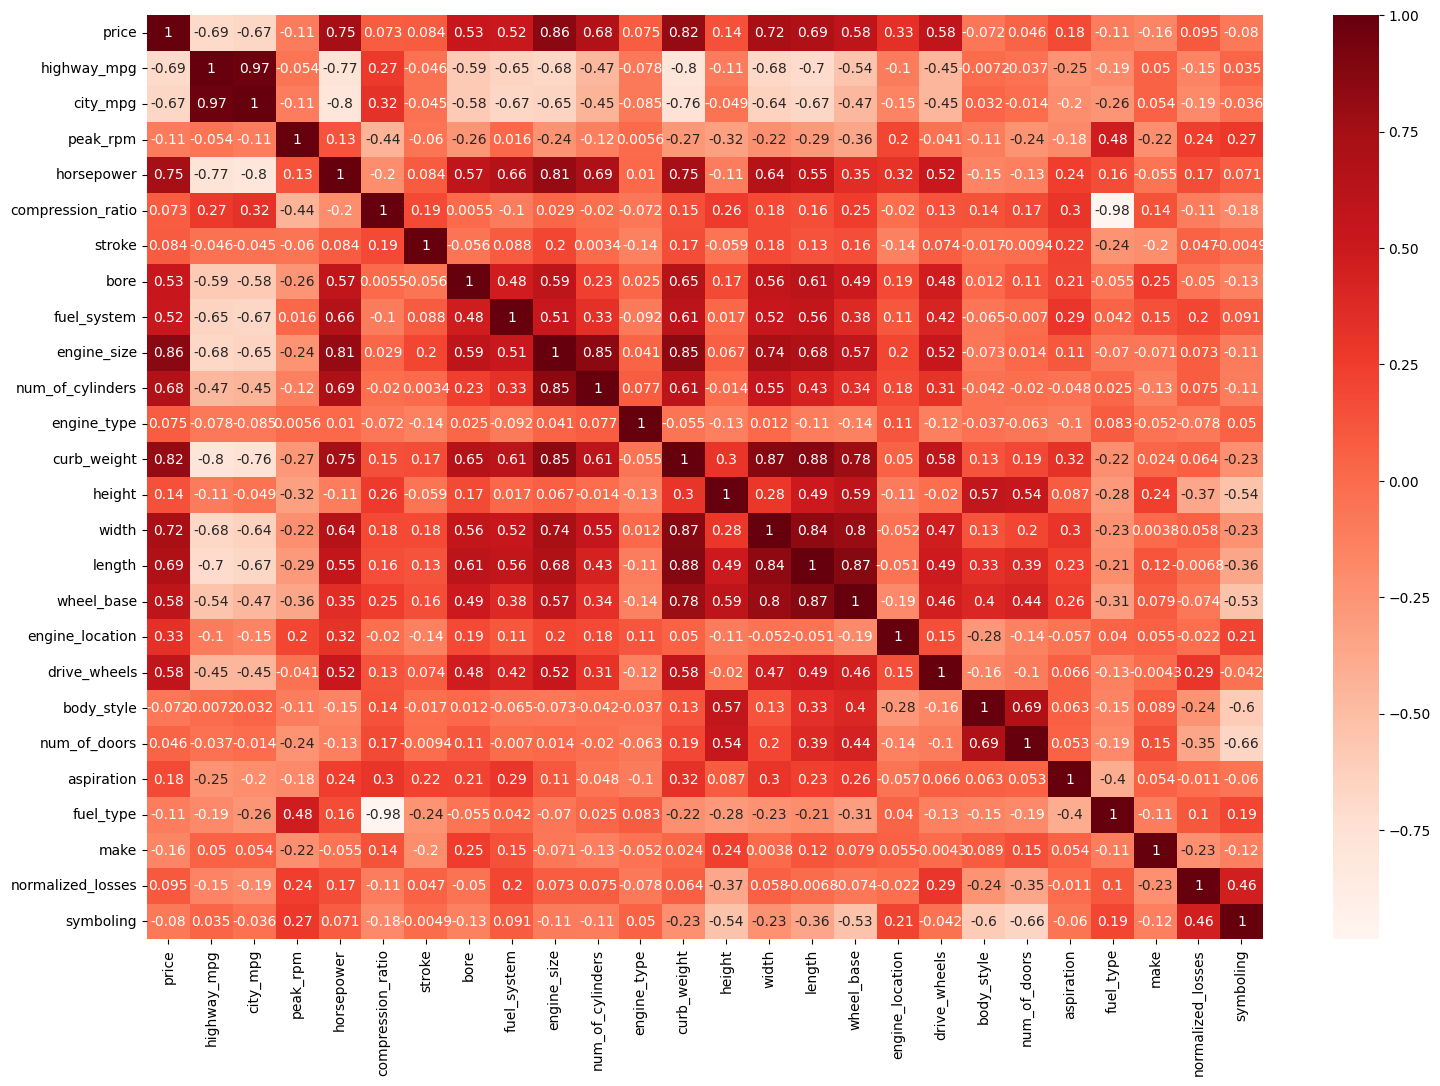

In [70]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot = True, cmap ='Reds')

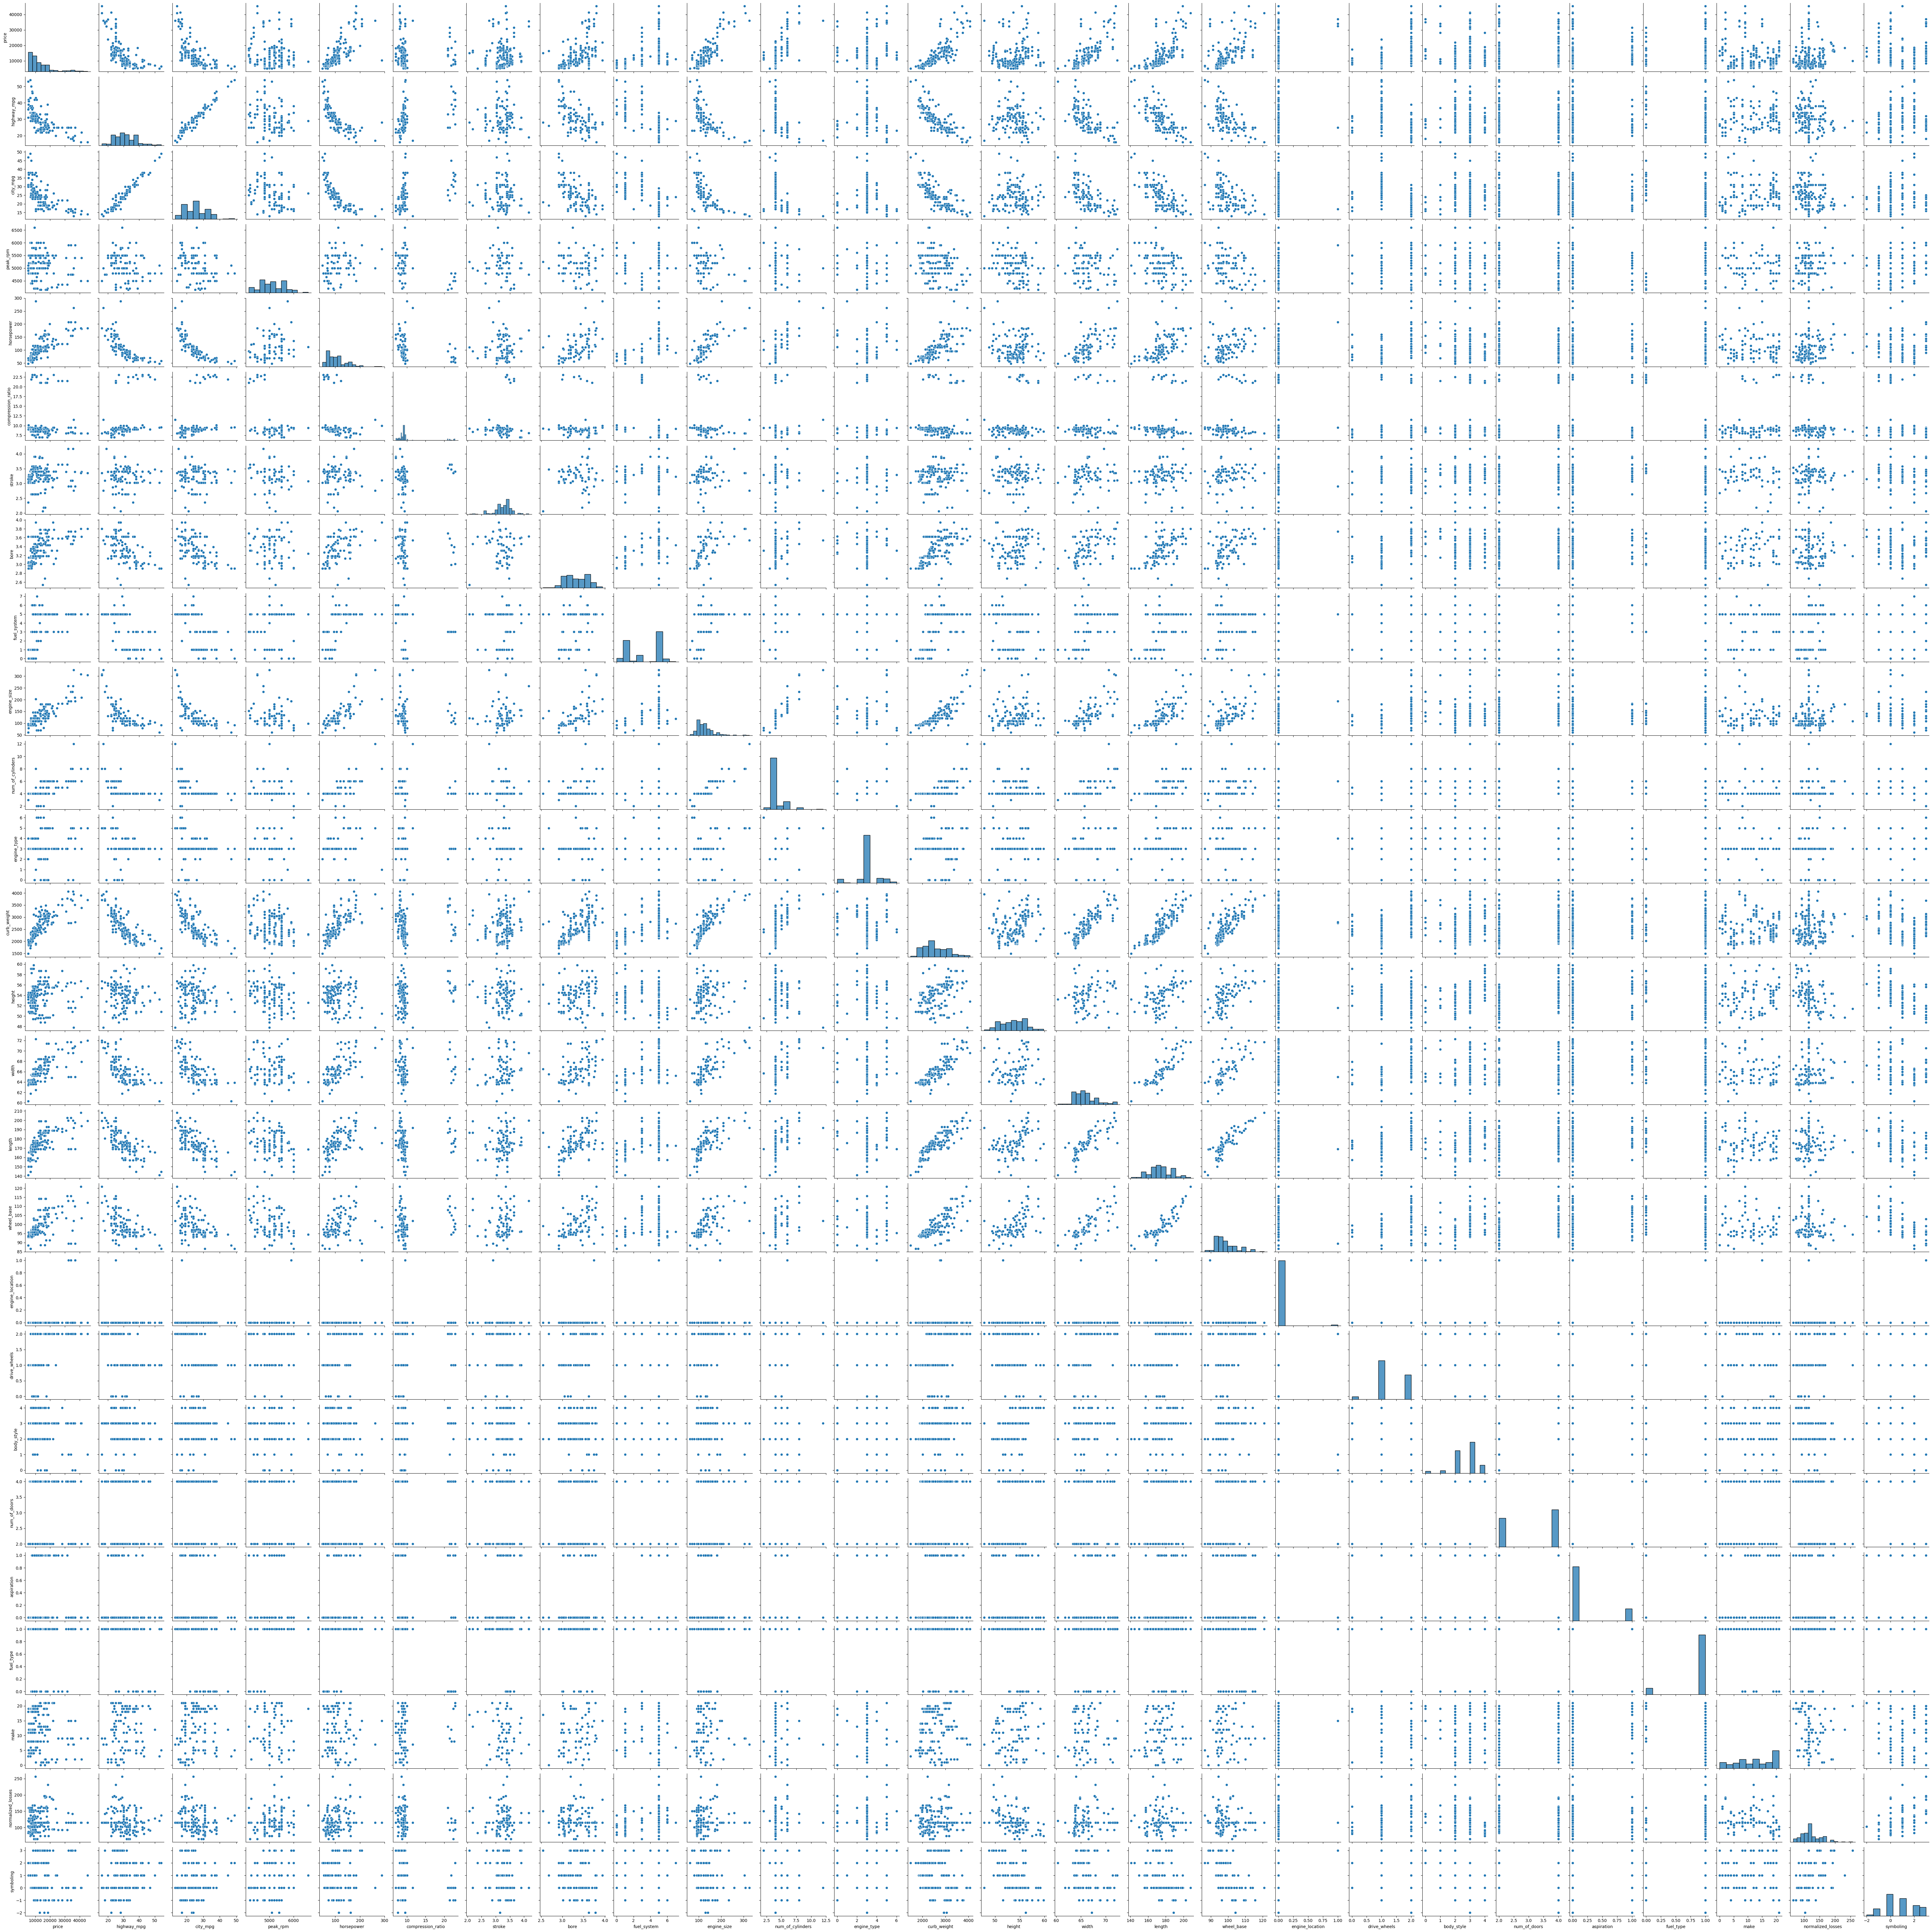

In [71]:
sns.pairplot(df)

Text(0.5, 0, 'Symboling - Insurance Risk Factor')

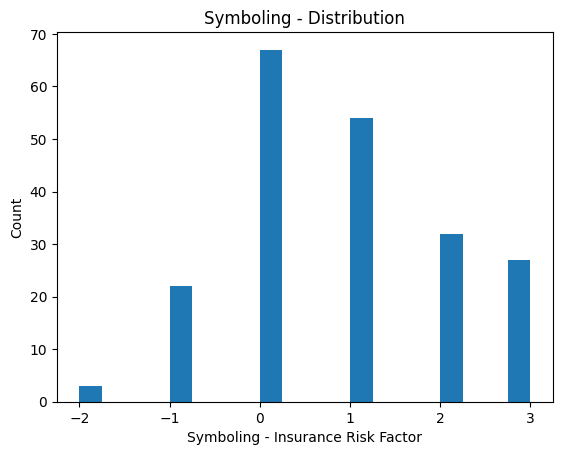

In [74]:
df['symboling'].plot(kind='hist',bins=20)
#automobile['symboling'].value_counts().plot(kind='bar',align='center',rot=1)
plt.title('Symboling - Distribution')
plt.ylabel('Count')
plt.xlabel('Symboling - Insurance Risk Factor')

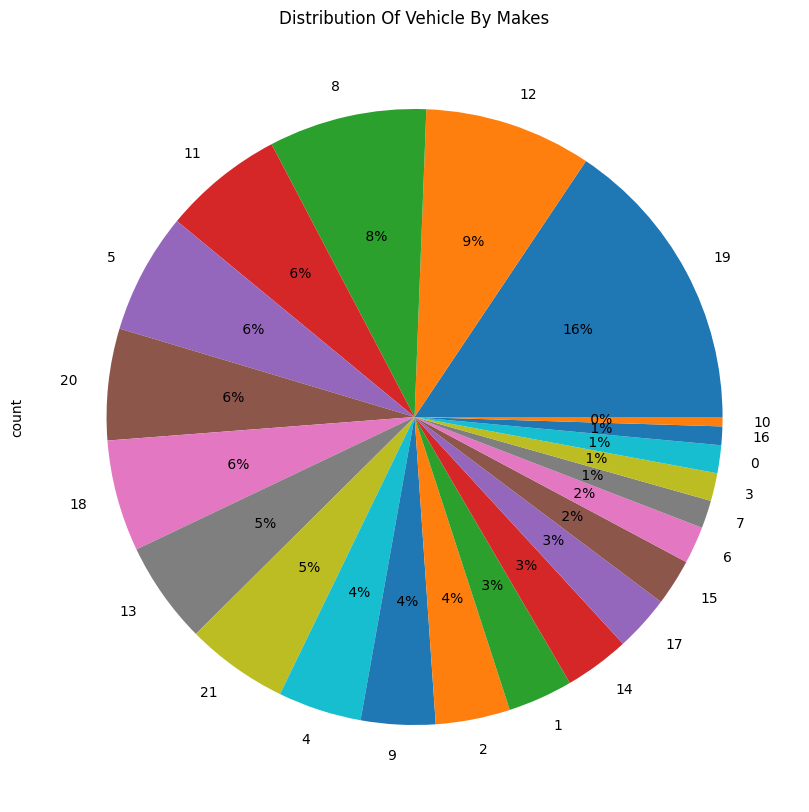

In [76]:
#Plotting a pie chart for the make attribute
df['make'].value_counts().plot(kind='pie',autopct='%2.0f%%',figsize=(10,10))
plt.title('Distribution Of Vehicle By Makes')
plt.show()

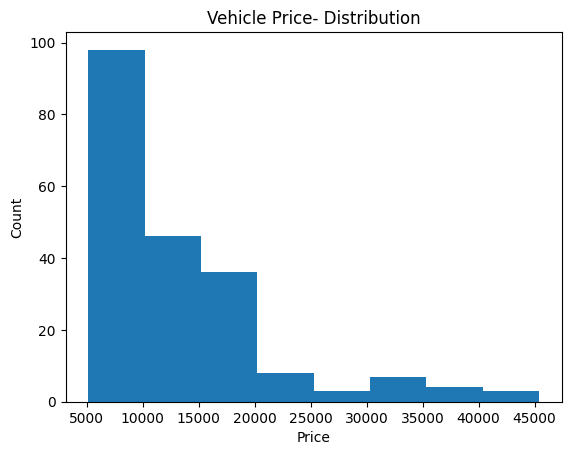

In [77]:
#plotting a histogram for the price of vehicles from the dataset
df['price'].plot(kind='hist',bins=8)
plt.title('Vehicle Price- Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

correlation between engine-size and price:


engine_size     price
engine_size     1.000000  0.860343
price           0.860343  1.000000

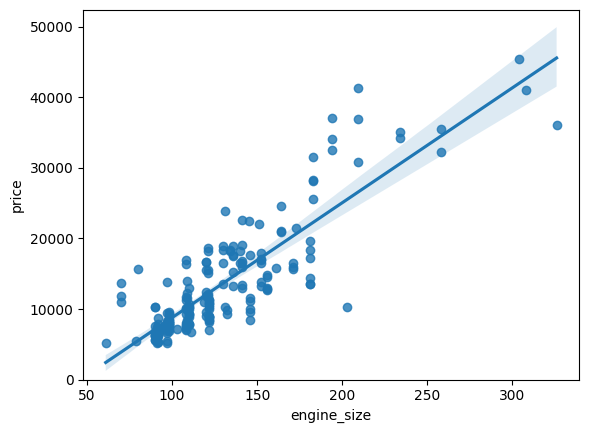

In [112]:
#engine size vs price

sns.regplot(x = 'engine_size', y = 'price', data = df)
plt.ylim(0,) # y axis starts from zero
print("correlation between engine-size and price:")
df[["engine_size", "price"]].corr()

An increase in engine size typically leads to a rise in price, suggesting a strong positive correlation between the two factors. The engine size is a reliable indicator of price, as evidenced by the near-perfect diagonal of the regression line. By analyzing the correlation coefficient, which is around 0.87, we can confirm the strength of this relationship.

# 📈 **Training a Linear Regression Model**

## **X and Y arrays**

In [152]:
X = df.drop('symboling', axis = 1)
y = df['symboling']

In [153]:
print("X = ",X.shape,"\ny = ",y.shape)

X =  (205, 25) 
y =  (205,)


# 🧱 **Train Test Split**

Now let's split the data into a training set and a testing set.We will train out model on the training set and then use the test set to evaluate the model.

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [155]:
X_train.shape

(143, 25)

In [156]:
X_test.shape

(62, 25)

# ✅ **Linear Regression**

In [157]:
model = LinearRegression()

In [158]:
model.fit(X_train, y_train)

LinearRegression()

# ✅ Model Evaluation

In [159]:
model.coef_

array([ 2.49277647e-05,  1.18369630e-02, -6.07840061e-02, -3.22475373e-04,
       -2.02770798e-03,  3.00149141e-01, -5.69872018e-01, -1.07605527e+00,
        7.48414841e-02,  2.09654545e-02, -7.68456117e-01, -7.89768721e-02,
       -4.29281251e-04, -1.87703221e-02,  1.09271937e-01,  1.70596738e-02,
       -1.13910617e-01,  4.59743827e-01, -7.22007465e-01, -5.52929512e-02,
       -6.17908783e-01,  3.32959378e-01,  3.95448768e+00, -9.34905066e-03,
        9.67219487e-03])

In [160]:
pd.DataFrame(model.coef_, X.columns, columns = ['Coefficients'])

Coefficients
price                  0.000025
highway_mpg            0.011837
city_mpg              -0.060784
peak_rpm              -0.000322
horsepower            -0.002028
compression_ratio      0.300149
stroke                -0.569872
bore                  -1.076055
fuel_system            0.074841
engine_size            0.020965
num_of_cylinders      -0.768456
engine_type           -0.078977
curb_weight           -0.000429
height                -0.018770
width                  0.109272
length                 0.017060
wheel_base            -0.113911
engine_location        0.459744
drive_wheels          -0.722007
body_style            -0.055293
num_of_doors          -0.617909
aspiration             0.332959
fuel_type              3.954488
make                  -0.009349
normalized_losses      0.009672

# ✅ **Predictions from our Model**

In [161]:
y_pred = model.predict(X_test)

# ✅ Regression Evaluation Metrics

In [162]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [163]:
MAE

0.6588821650996092

In [164]:
MSE

0.692762360222614

In [165]:
RMSE

0.8323234709069629

In [166]:
df['symboling'].mean()

0.8341463414634146

# **Residual Historgram**

In [167]:
test_residual = y_test - y_pred

<Axes: ylabel='Density'>

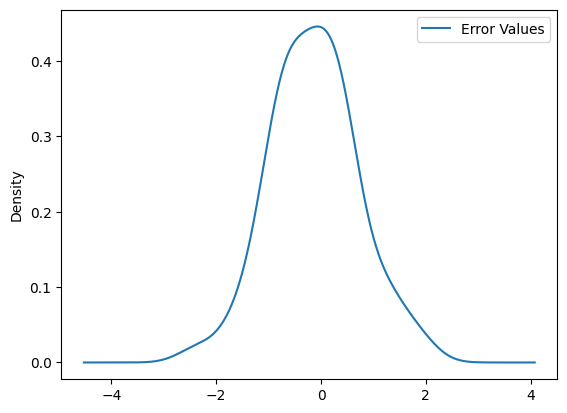

In [168]:
pd.DataFrame({'Error Values':(test_residual)}).plot.kde()

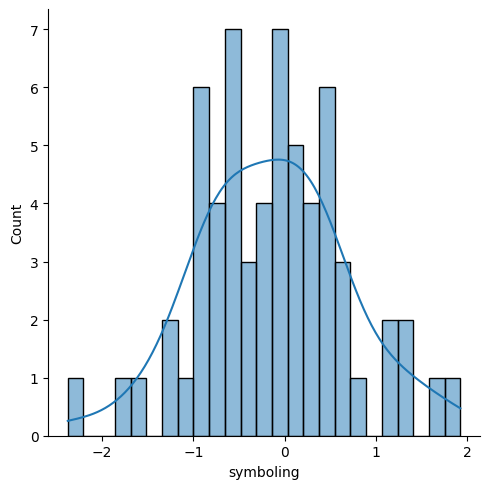

In [169]:
sns.displot(test_residual, bins = 25 , kde =True)

* Residual plot shows residual error VS. true y value

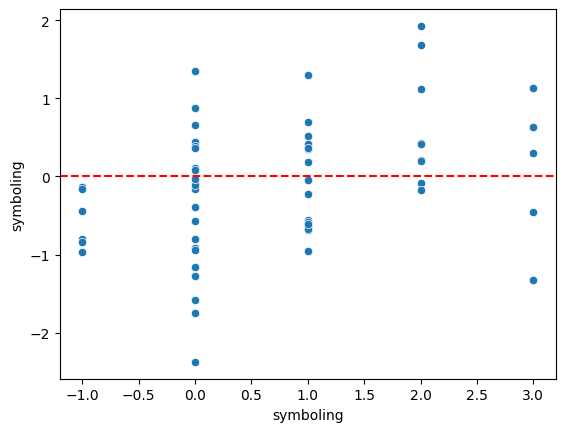

In [170]:
sns.scatterplot(x=y_test,y =test_residual)

plt.axhline(y=0,color ='r', ls ='--')

###**Conclusion***

* We use a dataset from UCI Machine Learning repository, to predict symboling  using linear regression

* Following the application of various imputation methods to address missing values, we conducted a thorough analysis of the dataset. This allowed us to uncover insights and patterns that were previously obscured, providing a more complete and accurate picture for our study.

* We conclude that the residual plot showing clear pattern, indicating Linear Regression is not valid!

---

#**Predicting Wine Classification using Logistic Regresssion**

In [171]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

##**Access each dataframe**

In [172]:
X.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline'],
      dtype='object')

In [173]:
y.columns

Index(['class'], dtype='object')

###**Merging the two separate dataframe**

In [178]:
import warnings
warnings.filterwarnings('ignore')

In [175]:
wine_df = pd.concat([X,y],axis =1)
wine_df

Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     0D280_0D315_of_diluted_wines  Proline  class  
0                            3.92     1065      1  
1                            3.40     1050      1  
2                            3.17     1185      1  
3                            3.45     1480      1  
4                            2.93      735      1  
..                            ...      ...    ...  
173                          1.74      740      3  
174                          1.56      750      3  
175                          1.56      835      3  
176                          1.62      840      3  
177                          1.60      560      3  

[178 rows x 14 columns]

Based on the information given in the dataset. We dont have any missing values therefore we can proceed into  data analysis.

### **Engineering Data Analysis**

In [215]:
wine_df['class'].unique()

array([1, 2, 3])

<Axes: xlabel='Alcohol', ylabel='class'>

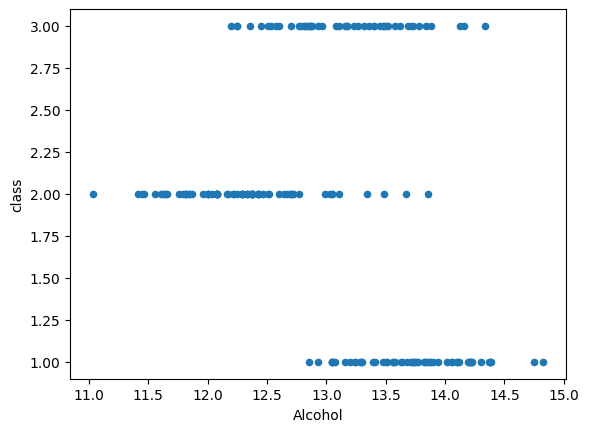

In [192]:
wine_df.plot.scatter(x = 'Alcohol', y = 'class')

<Axes: >

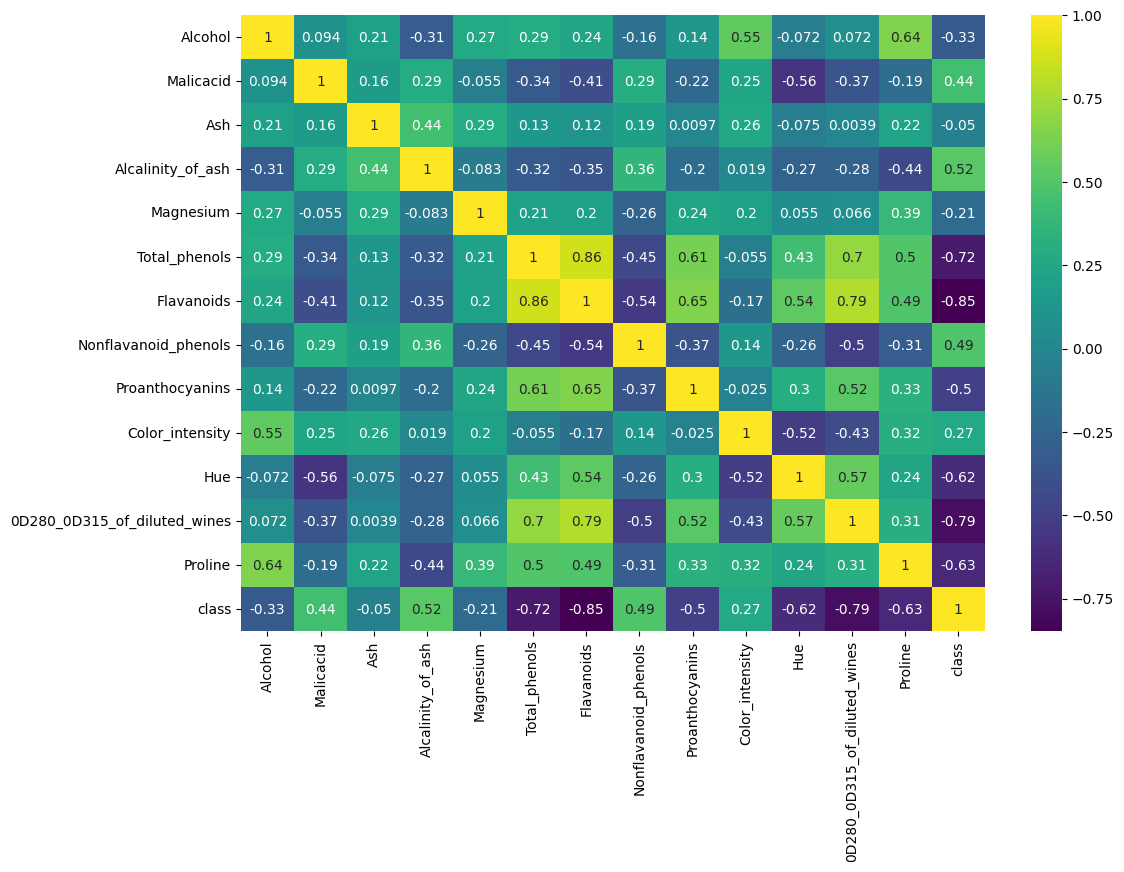

In [177]:
plt.figure(figsize=(12,8))
sns.heatmap(wine_df.corr(), annot=True, cmap='viridis')

###**Logistic Regression**

In [179]:
print(round(wine_df.describe()),2)

       Alcohol  Malicacid    Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
count    178.0      178.0  178.0              178.0      178.0          178.0   
mean      13.0        2.0    2.0               19.0      100.0            2.0   
std        1.0        1.0    0.0                3.0       14.0            1.0   
min       11.0        1.0    1.0               11.0       70.0            1.0   
25%       12.0        2.0    2.0               17.0       88.0            2.0   
50%       13.0        2.0    2.0               20.0       98.0            2.0   
75%       14.0        3.0    3.0               22.0      107.0            3.0   
max       15.0        6.0    3.0               30.0      162.0            4.0   

       Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity  \
count       178.0                 178.0            178.0            178.0   
mean          2.0                   0.0              2.0              5.0   
std           1.0                   0.0

Text(0, 0.5, 'Hue')

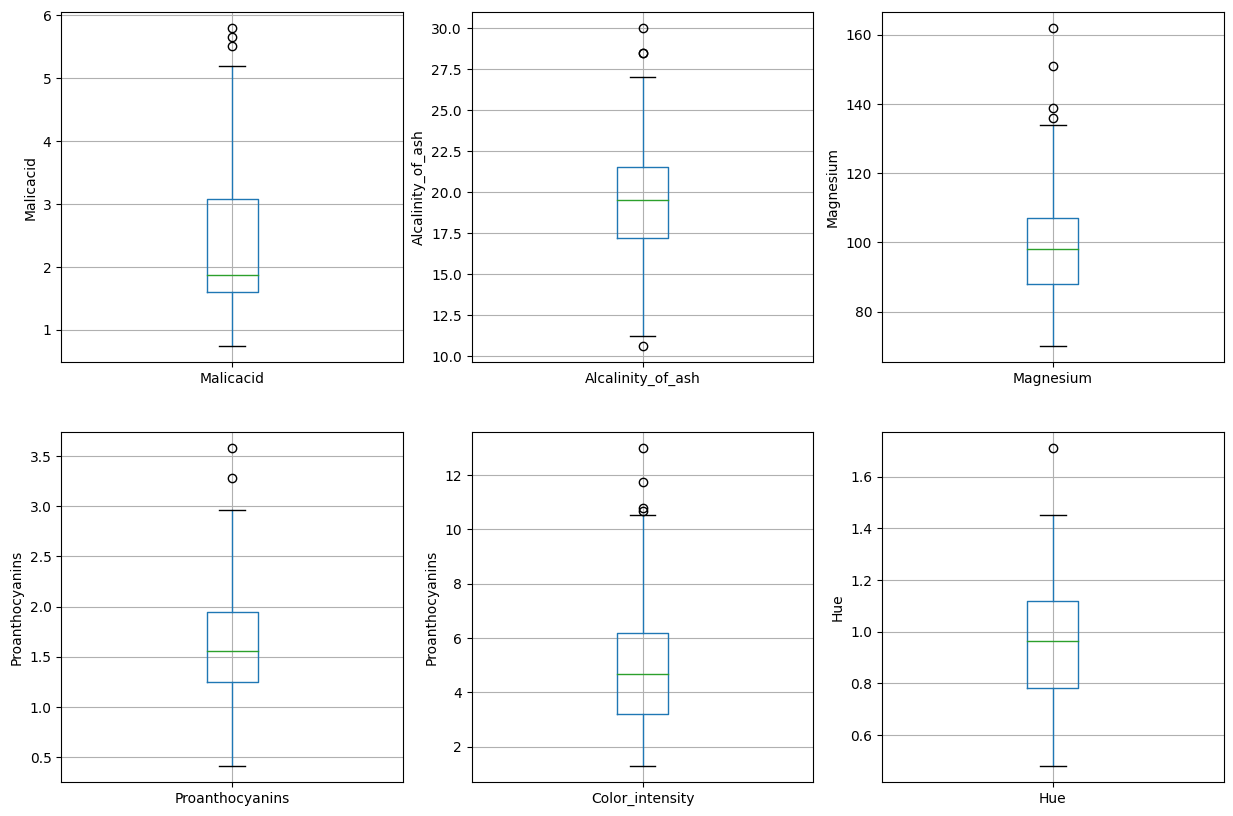

In [182]:
# draw boxplot to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
fig = df.boxplot(column = 'Malicacid')
fig.set_title('')
fig.set_ylabel('Malicacid')

plt.subplot(2,3,2)
fig = df.boxplot(column = 'Alcalinity_of_ash')
fig.set_title('')
fig.set_ylabel('Alcalinity_of_ash')

plt.subplot(2,3,3)
fig = df.boxplot(column = 'Magnesium')
fig.set_title('')
fig.set_ylabel('Magnesium')

plt.subplot(2,3,4)
fig = df.boxplot(column = 'Proanthocyanins' )
fig.set_title('')
fig.set_ylabel('Proanthocyanins')

plt.subplot(2,3,5)
fig = df.boxplot(column = 'Color_intensity' )
fig.set_title('')
fig.set_ylabel('Proanthocyanins')

plt.subplot(2,3,6)
fig = df.boxplot(column = 'Hue' )
fig.set_title('')
fig.set_ylabel('Hue')







Text(0, 0.5, '')

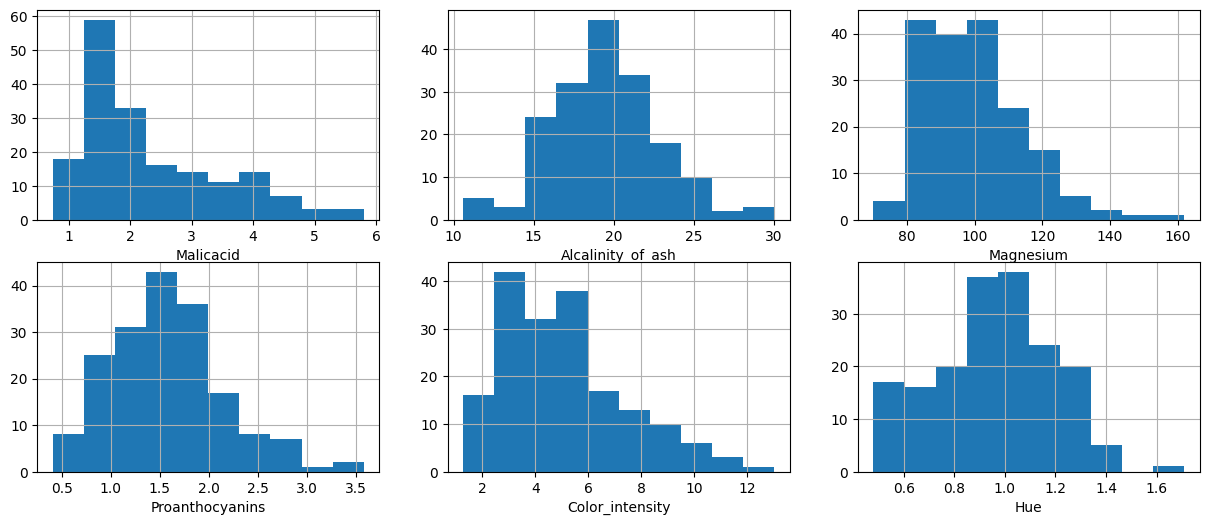

In [183]:
# plot histogram to check distribution
# this is to determine which step would be next
plt.figure(figsize=(15,6))

plt.subplot(2, 3, 1)
fig = wine_df.Malicacid.hist(bins=10)
fig.set_xlabel('Malicacid')
fig.set_ylabel('')

plt.subplot(2, 3, 2)
fig = wine_df.Alcalinity_of_ash.hist(bins=10)
fig.set_xlabel('Alcalinity_of_ash')
fig.set_ylabel('')

plt.subplot(2, 3, 3)
fig = wine_df.Magnesium.hist(bins=10)
fig.set_xlabel('Magnesium')
fig.set_ylabel('')

plt.subplot(2, 3, 4)
fig = wine_df.Proanthocyanins.hist(bins=10)
fig.set_xlabel('Proanthocyanins')
fig.set_ylabel('')

plt.subplot(2, 3, 5)
fig = wine_df.Color_intensity.hist(bins=10)
fig.set_xlabel('Color_intensity')
fig.set_ylabel('')

plt.subplot(2, 3, 6)
fig = wine_df.Hue.hist(bins=10)
fig.set_xlabel('Hue')
fig.set_ylabel('')

In [184]:
# since all 4 are skewed, next step would be interquartile range to find the outliers
IQR = wine_df['Malicacid'].quantile(0.75) - wine_df['Malicacid'].quantile(0.25)
Lower_fence = wine_df['Malicacid'].quantile(0.25) - (IQR * 1.5)
Upper_fence = wine_df['Malicacid'].quantile(0.75) + (IQR * 1.5)
print(f"Malicacid outliers are values < {Lower_fence}  or > {Upper_fence}")

Malicacid outliers are values < -0.6174999999999997  or > 5.3025


In [185]:
IQR = wine_df['Alcalinity_of_ash'].quantile(0.75) - wine_df['Alcalinity_of_ash'].quantile(0.25)
Lower_fence = wine_df['Alcalinity_of_ash'].quantile(0.25) - (IQR * 1.5)
Upper_fence = wine_df['Alcalinity_of_ash'].quantile(0.75) + (IQR * 1.5)
print(f"Alcalinity_of_ash outliers are values < {Lower_fence}  or > {Upper_fence}")

Alcalinity_of_ash outliers are values < 10.749999999999998  or > 27.950000000000003


In [186]:
IQR = wine_df['Magnesium'].quantile(0.75) - wine_df['Magnesium'].quantile(0.25)
Lower_fence = wine_df['Magnesium'].quantile(0.25) - (IQR * 1.5)
Upper_fence = wine_df['Magnesium'].quantile(0.75) + (IQR * 1.5)
print(f"Magnesium outliers are values < {Lower_fence}  or > {Upper_fence}")

Magnesium outliers are values < 59.5  or > 135.5


In [187]:
IQR = wine_df['Proanthocyanins'].quantile(0.75) - wine_df['Proanthocyanins'].quantile(0.25)
Lower_fence = wine_df['Proanthocyanins'].quantile(0.25) - (IQR * 1.5)
Upper_fence = wine_df['Proanthocyanins'].quantile(0.75) + (IQR * 1.5)
print(f"Proanthocyanins outliers are values < {Lower_fence}  or > {Upper_fence}")

Proanthocyanins outliers are values < 0.20000000000000018  or > 3.0


In [188]:
IQR = wine_df['Color_intensity'].quantile(0.75) - wine_df['Color_intensity'].quantile(0.25)
Lower_fence = wine_df['Color_intensity'].quantile(0.25) - (IQR * 1.5)
Upper_fence = wine_df['Color_intensity'].quantile(0.75) + (IQR * 1.5)
print(f"Color_intensity outliers are values < {Lower_fence}  or > {Upper_fence}")

Color_intensity outliers are values < -1.2500000000000009  or > 10.670000000000002


In [193]:
IQR = wine_df['Hue'].quantile(0.75) - wine_df['Hue'].quantile(0.25)
Lower_fence = wine_df['Hue'].quantile(0.25) - (IQR * 1.5)
Upper_fence = wine_df['Hue'].quantile(0.75) + (IQR * 1.5)
print(f"Hue outliers are values < {Lower_fence}  or > {Upper_fence}")

Hue outliers are values < 0.2762499999999998  or > 1.6262500000000002


##**Declare feature vector and target variable**



In [194]:
# Declare feature vector and target variable
X = wine_df.drop(['class'], axis=1)
y = wine_df['class']

###**Split data into separate training and test set**

In [195]:
#split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [196]:
#check the shape of  X_train and X_test

X_train.shape, X_test.shape

((142, 13), (36, 13))

In [197]:
#check data types in X_train

X_train.dtypes

Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
dtype: object

In [198]:
#display numerical variables

numerical = [ col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Alcohol',
 'Malicacid',
 'Ash',
 'Alcalinity_of_ash',
 'Magnesium',
 'Total_phenols',
 'Flavanoids',
 'Nonflavanoid_phenols',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 '0D280_0D315_of_diluted_wines',
 'Proline']

####**Engineering outliers in numerical variables**

We have seen that the`Alcalinity_of_ash`, `Color intensity`,`Hue`,`Magnesium`,`Malicacid`, and `Proanthocyanin` columns contain outliers. We will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [199]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Malicacid'] = max_value(df3, 'Malicacid', 5.30)
    df3['Alcalinity_of_ash'] = max_value(df3, 'Alcalinity_of_ash', 27.95)
    df3['Magnesium'] = max_value(df3, 'Magnesium', 135.5)
    df3['Proanthocyanins'] = max_value(df3, 'Proanthocyanins', 3)
    df3['Color_intensity'] = max_value(df3, 'Color_intensity', 10.67)
    df3['Hue'] = max_value(df3, 'Hue', 1.63)

In [200]:
X_train['Malicacid'].max(), X_test['Malicacid'].max()

(5.3, 5.3)

In [201]:
X_train['Alcalinity_of_ash'].max(), X_test['Alcalinity_of_ash'].max()

(27.95, 27.95)

In [202]:
X_train['Magnesium'].max(), X_test['Magnesium'].max()

(135.5, 132.0)

In [203]:
X_train['Proanthocyanins'].max(), X_test['Proanthocyanins'].max()

(3.0, 2.45)

In [204]:
X_train['Color_intensity'].max(), X_test['Color_intensity'].max()

(10.67, 10.67)

In [205]:
X_train['Hue'].max(), X_test['Hue'].max()

(1.63, 1.38)

In [207]:
X_train.describe()

Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  142.000000  142.000000  142.000000         142.000000  142.000000   
mean    12.984859    2.368662    2.366901          19.536620   99.739437   
std      0.807175    1.104345    0.269684           3.392529   13.154391   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.347500    1.602500    2.222500          17.250000   89.000000   
50%     13.040000    1.895000    2.360000          19.500000   98.000000   
75%     13.637500    3.222500    2.560000          21.500000  106.750000   
max     14.750000    5.300000    3.220000          27.950000  135.500000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     142.000000  142.000000            142.000000       142.000000   
mean        2.258662    1.949155              0.363521         1.600000   
std         0.611691    0.975921              0.127709         0.574072   
min         1.100000    0.470000              0.130000         0.420000   
25%         1.705000    1.037500              0.270000         1.242500   
50%         2.210000    2.035000              0.340000         1.555000   
75%         2.735000    2.760000              0.450000         1.957500   
max         3.880000    3.740000              0.660000         3.000000   

       Color_intensity         Hue  0D280_0D315_of_diluted_wines      Proline  
count       142.000000  142.000000                    142.000000   142.000000  
mean          5.021127    0.952789                      2.586268   742.330986  
std           2.312173    0.228141                      0.722643   303.784935  
min           1.280000    0.540000                      1.270000   290.000000  
25%           3.102500    0.780000                      1.875000   511.250000  
50%           4.600000    0.960000                      2.760000   675.000000  
75%           6.275000    1.120000                      3.167500   932.750000  
max          10.670000    1.630000                      4.000000  1547.000000

###**Feature Scaling**

In [208]:
cols = X_train.columns

In [209]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [210]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [211]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [212]:
X_train.describe()

Alcohol   Malicacid         Ash Alcalinity_of_ash   Magnesium  \
count  142.000000  142.000000  142.000000        142.000000  142.000000   
mean     0.525500    0.357163    0.541345          0.515079    0.454037   
std      0.216983    0.242181    0.144991          0.195535    0.200830   
min      0.000000    0.000000    0.000000          0.000000    0.000000   
25%      0.354167    0.189145    0.463710          0.383285    0.290076   
50%      0.540323    0.253289    0.537634          0.512968    0.427481   
75%      0.700941    0.544408    0.645161          0.628242    0.561069   
max      1.000000    1.000000    1.000000          1.000000    1.000000   

      Total_phenols  Flavanoids Nonflavanoid_phenols Proanthocyanins  \
count    142.000000  142.000000           142.000000      142.000000   
mean       0.416785    0.452341             0.440606        0.457364   
std        0.220033    0.298447             0.240960        0.222509   
min        0.000000    0.000000             0.000000        0.000000   
25%        0.217626    0.173547             0.264151        0.318798   
50%        0.399281    0.478593             0.396226        0.439922   
75%        0.588129    0.700306             0.603774        0.595930   
max        1.000000    1.000000             1.000000        1.000000   

      Color_intensity         Hue 0D280_0D315_of_diluted_wines     Proline  
count      142.000000  142.000000                   142.000000  142.000000  
mean         0.398416    0.378705                     0.482149    0.359850  
std          0.246238    0.209304                     0.264704    0.241675  
min          0.000000    0.000000                     0.000000    0.000000  
25%          0.194089    0.220183                     0.221612    0.176014  
50%          0.353568    0.385321                     0.545788    0.306285  
75%          0.531949    0.532110                     0.695055    0.511337  
max          1.000000    1.000000                     1.000000    1.000000

We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. We will do it as follows.

###**Model training**

In [213]:
#train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

#instatiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

#fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

###**Predicting Results**

In [214]:
# Predicting results
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

####**predict_proba method**

**predict_proba** method gives the probabilities for the target variable in array form

In [216]:
# predict proba: predicts possibilities for the target variable
logreg.predict_proba(X_test)[:,0]

array([0.84608661, 0.08048314, 0.33554459, 0.80152316, 0.22039744,
       0.24522358, 0.87468447, 0.03848718, 0.15948773, 0.05898538,
       0.14507607, 0.0358635 , 0.93262766, 0.47681744, 0.07875799,
       0.12976804, 0.79007758, 0.95638587, 0.08820506, 0.84199176,
       0.47786966, 0.67550962, 0.47265773, 0.23584062, 0.08901126,
       0.15152147, 0.20646317, 0.04988917, 0.07608428, 0.07232845,
       0.83715721, 0.86643051, 0.0791357 , 0.81872064, 0.87889396,
       0.67623076])

In [217]:
logreg.predict_proba(X_test)[:,1]

array([0.10773965, 0.04382495, 0.65481533, 0.1525236 , 0.66114073,
       0.74433276, 0.07438344, 0.12116596, 0.78373262, 0.80051396,
       0.1289791 , 0.07885248, 0.03352518, 0.51535383, 0.06169256,
       0.85700534, 0.14896474, 0.01820935, 0.40806803, 0.14198268,
       0.51407897, 0.25405006, 0.43617131, 0.73190936, 0.59297914,
       0.78249892, 0.7421782 , 0.86155799, 0.73512681, 0.0449725 ,
       0.12680024, 0.09818553, 0.64410061, 0.05781283, 0.08848967,
       0.30025453])

In [218]:
logreg.predict_proba(X_test)[:,2]

array([0.04617374, 0.87569191, 0.00964009, 0.04595323, 0.11846182,
       0.01044366, 0.05093209, 0.84034686, 0.05677965, 0.14050066,
       0.72594482, 0.88528401, 0.03384715, 0.00782873, 0.85954945,
       0.01322662, 0.06095768, 0.02540478, 0.50372691, 0.01602556,
       0.00805136, 0.07044032, 0.09117095, 0.03225002, 0.31800959,
       0.06597962, 0.05135863, 0.08855284, 0.18878891, 0.88269905,
       0.03604255, 0.03538396, 0.27676368, 0.12346652, 0.03261637,
       0.02351471])

###**Checking Accuracy Score**

In [219]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred_test)))

Model accuracy score: 0.9722


Here, **y_test** are the true class labels and **y_pred_test** are the predicted class labels in the test-set.

####**Compare the train-set and test-set accuracy**

Now, we will compare the train-set and test-set accuracy to check for overfitting.

In [220]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([3, 2, 2, 3, 1, 1, 2, 2, 2, 1, 3, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3,
       2, 3, 3, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3, 3, 2, 2,
       2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1, 2, 1, 2,
       2, 1, 3, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 2, 1, 1,
       1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 2,
       3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 1, 1, 3, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 3])

In [221]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9789


####**Check for overfitting and underfitting**

In [222]:
# print the scores on  training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train,y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9789
Test set score: 0.9722


The training-set accuracy score is 0.9789 while the test-set accuracy to be 0.9722. This two values are quite comparable. So, there is might be overfitting.



In [223]:
# fit the Logistic Regression model with C=100

#instantiate the model

logreg100 = LogisticRegression(C=100, solver = 'liblinear', random_state=0)

#fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [224]:
# print the scores on  training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train,y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [225]:
# fit the Logistic Regression model with C=0.01

#instantiate the model

logreg001 = LogisticRegression(C=0.01, solver = 'liblinear', random_state=0)

#fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [226]:
# print the scores on  training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train,y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.9225
Test set score: 0.9167


So, if we use more regularized model by setting C=0.01,then both training and test set accuracy increase the relaive of the default parameter. if we use  C = 100, there could be a risk of overfitting.

####**Compare model accuracy with null accuracy**

So, the model accuracy of 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predictiong the most frequesnt class.

In [227]:
# check class distribution in test set

y_test.value_counts()

class
2    16
1    14
3     6
Name: count, dtype: int64

In [230]:
#check null accuracy score

null_accuracy = (16/(16+14+6))

print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.4444


Test set score: 0.9722

We can see that our model accuracy score is  0.9722 but the null accuracy is  0.4444. So, we conclude that our Logistic Regression model is doing a very good job in predicting  the class labels.

Now, based on the above analysis we can conclide that our classification model accuract is very good. Our model is doing a very good job in terms in predicting the class labels.

But, it does not gie the underlying distribution of values. Also, it does not tell anything about the type of errors our classifier is making.

We have another tool called `Confusion matrix` that comes to our rescue.

In [232]:
# Print the confusion matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion Matrix \n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix 

 [[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]

True Positives(TP) =  14

True Negatives(TN) =  15

False Positives(FP) =  0

False Negatives(FN) =  0


<Axes: >

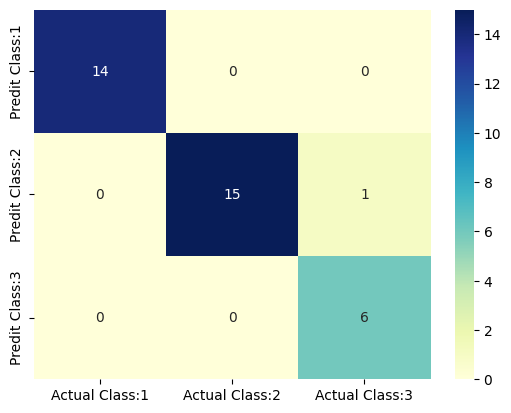

In [234]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Class:1', 'Actual Class:2', 'Actual Class:3'],
                         index=['Predit Class:1', 'Predit Class:2', 'Predit Class:3'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

###**Classification Report**

In [235]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



In [236]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [237]:
# print classification accuracy

classification_accuracy = (TP + TN)/float(TP + TN + FP + FN)

print('Classsification accuracy : {0:0.4f}'.format(classification_accuracy))

Classsification accuracy : 1.0000


###**Classification error**

In [238]:

# print classification error

classification_error = (FP + FN)/float(TP + TN + FP + FN)

print('Classsification error : {0:0.4f}'.format(classification_error))

Classsification error : 0.0000


**Precision Score**

In [239]:
# print precision score

precision = TP/float(TP +FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


**Recall**

In [240]:
recall =TP/ float(TP+FN)

print('Recall or Sensitivity: {0:0.4f}'.format(recall))

Recall or Sensitivity: 1.0000


**Positivity**

In [241]:
true_positive_rate = TP/ float(TP + FN)

print('True Positive Rate: {0:0.4f}'.format(true_positive_rate))

True Positive Rate: 1.0000


**Specificity**

In [242]:
specificity = TN/ (TN + FP)

print('Specificity: {0:0.4f}'.format(specificity))

Specificity: 1.0000


##**Adjusting threshold level**

In [243]:
#print the first 10 predicted probabilities of two classes - 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.84608661, 0.10773965, 0.04617374],
       [0.08048314, 0.04382495, 0.87569191],
       [0.33554459, 0.65481533, 0.00964009],
       [0.80152316, 0.1525236 , 0.04595323],
       [0.22039744, 0.66114073, 0.11846182],
       [0.24522358, 0.74433276, 0.01044366],
       [0.87468447, 0.07438344, 0.05093209],
       [0.03848718, 0.12116596, 0.84034686],
       [0.15948773, 0.78373262, 0.05677965],
       [0.05898538, 0.80051396, 0.14050066]])

In [245]:
#store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data = y_pred_prob, columns = ['class (1)', 'class(2)', 'class(3)'])

y_pred_prob_df

class (1)  class(2)  class(3)
0   0.846087  0.107740  0.046174
1   0.080483  0.043825  0.875692
2   0.335545  0.654815  0.009640
3   0.801523  0.152524  0.045953
4   0.220397  0.661141  0.118462
5   0.245224  0.744333  0.010444
6   0.874684  0.074383  0.050932
7   0.038487  0.121166  0.840347
8   0.159488  0.783733  0.056780
9   0.058985  0.800514  0.140501

In [244]:
# print the first 10 predicted probabilities
logreg.predict_proba(X_test)[0:10, 1]

array([0.10773965, 0.04382495, 0.65481533, 0.1525236 , 0.66114073,
       0.74433276, 0.07438344, 0.12116596, 0.78373262, 0.80051396])

In [246]:
# store the predited probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:,1]

Text(0, 0.5, 'Frequency')

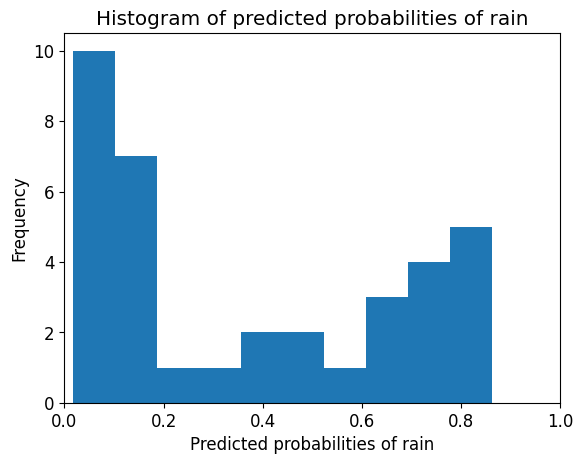

In [255]:
# plot histogram of predicted probabilities

#adjust the font size
plt.rcParams['font.size'] = 12

#plot histrogram with 10 bins
plt.hist(y_pred1, bins = 10)

#set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')

#set the x-axis limit
plt.xlim(0,1)

#set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

In [272]:
# Applying  5-fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))


Cross-validation scores:[0.93103448 0.96551724 0.96428571 1.         0.96428571]


In [266]:
# k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.93103448 0.96551724 0.96428571 1.         0.96428571]


In [273]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9650


In [274]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['11','12']},
              {'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose = 0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['11', '12']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [275]:
#examin the best model

#best score achieved during the GridSearchCV
print('GridSeach CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

#print parameters that give the best results
print('Parameters that give the best results :','\n\n',(grid_search.best_params_))

#print estimator that was chosen by GridSearc
print('\n\nEstimate that was chosen by the search :','\n\n',(grid_search.best_estimator_))

GridSeach CV best score : 0.9650


Parameters that give the best results : 

 {'C': 1}


Estimate that was chosen by the search : 

 LogisticRegression(C=1, random_state=0, solver='liblinear')


In [276]:
#calculate GridSearch CV score on test set

print('GridSeach CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSeach CV score on test set: 0.9722


**Conclusion**

* We perform several data analysis in the data from UCI Machine Learning Repository (Wine dataset)

* Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.


* The dataset may consider to be overfitting since the data train data result is higher than the test data result.

* Our, original model score is found to be 0.9722 . The average cross validation score is 0.9650. So we can conclude that cross-validation does not result in performance improvement.

* Our original model test accuracy is 0.9722 while GridSearch CV accuracy is 0.9722. We can see that GridSearch Cv doesn't improve the performance for this particular model.